In [74]:
import torch
from IPython.display import SVG
from sknetwork.data import house, bow_tie, karate_club, miserables, painters, hourglass, star_wars, movie_actor
from sknetwork.visualization import svg_graph, svg_bigraph

from matplotlib import pyplot as plt

## Load graph
Load Painters graph

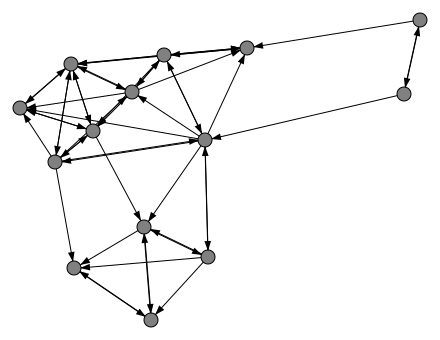

In [75]:
graph = painters(metadata=True)
adjacency = graph.adjacency
names = graph.names
position = graph.position

# Visualization
image = svg_graph(adjacency, position)
SVG(image)

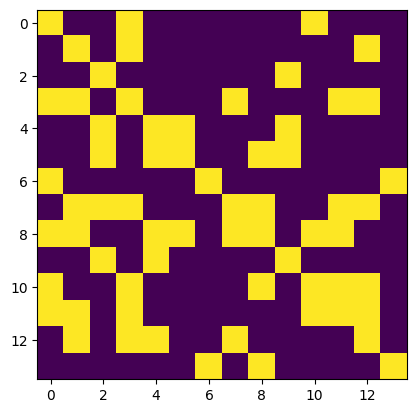

In [76]:
# convert adjacency matrix to tensor
adj = torch.tensor(adjacency.todense(), dtype=torch.float32)
adj = adj + torch.eye(adj.shape[0])
# 

plt.imshow(adj.detach())

## Import GraphEmbeddings framework

In [77]:
from graph_embeddings.models.L2Model import L2Model
from graph_embeddings.utils.trainer import Trainer
from graph_embeddings.utils.loss import L2_loss
from graph_embeddings.utils.logger import JSONLogger

Train a graph embedding model using GraphEmbeddings framework and $rank = 2$

In [80]:
JSONLogger.finish()

Logging complete. Data stored in results/GraphEmbeddings/log_913fe5f3-c5dd-4f86-9281-ab4344fc3703.json


In [81]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


# Train model
loss_fn = L2_loss
learning_rate = 1e-2
num_epochs = 10000
rank = 3

# Initialize the trainer
trainer = Trainer(adj=adj, model_class=L2Model, loss_fn=loss_fn, model_init='random',
                  threshold=10e-5, num_epochs=num_epochs, save_ckpt='results/model.pt', optim_type='adam', # 'lbfgs', 'adam', 'sgd
                  device=device, loggers=[JSONLogger])#, wandb])


save_path = f'/Users/alf/Repos/GraphEmbeddings/results/models/model_paintings_rank{rank}.pt'
trainer.train(rank = rank, lr=learning_rate, save_path=save_path)

L2Model rank=3, epoch=2966, loss=7.9 Frob. err.: 0.0000:  30%|██▉       | 2960/10000 [00:16<00:39, 180.06it/s] 


Full reconstruction at epoch 2966 with rank 3
Logging complete. Data stored in results/GraphEmbeddings/log_31afd9a4-2d9a-4b79-9302-1333dedba990.json


L2Model()

In [34]:
# load saved model
path = f'/Users/alf/Repos/GraphEmbeddings/results/models/model_paintings_rank{rank}_FR.pt'
X,Y, beta = torch.load(path)
X, Y, beta = X.detach(), Y.detach(), beta.detach()

print(beta)


tensor([18.7822])


We should plot below in 3D space

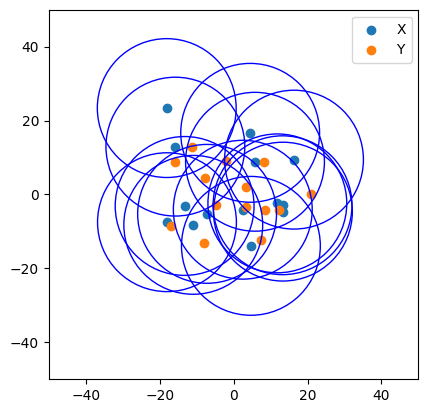

In [47]:
plt.scatter(X[:,0], X[:,1], label="X")
plt.scatter(Y[:,0], Y[:,1], label="Y")
# plot circle around each point with radius beta
for i in range(X.shape[0]):
    circle = plt.Circle((X[i,0], X[i,1]), beta, color='blue', fill=False)

    plt.gcf().gca().add_artist(circle)

# x, y limits of the plot
plt.xlim(-50,50)
plt.ylim(-50,50)
# Make plot square
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.show()
